# Calculating the Seats-Votes Curve
The following code estimates the seats-votes curve using both the Uniform Partisan Swing Assumption (Katz et al.) and the Modified Partisan Swing Assumption (Nagle).

In [146]:
# Import necessary libraries.
import io
import csv

from __future__ import division

In [147]:
# TO DO: Import the same input data set used in the Markov Chain.
infile = io.open("C:/Users/Anna Marie Vagnozzi/Desktop/To_File/Research/2021_Redistricting_Group/partisan_bias_analysis/InputSCSen.csv",newline='')
reader = csv.reader(infile)
header = next(reader)

# Read in PSN, nb, sp, unshared, area, pop, voteA, voteB, <district>, county
precinct_data = [[eval(row[0]),row[1],row[2],eval(row[3]),eval(row[4]),eval(row[5]),eval(row[6]),eval(row[7]),eval(row[8]),row[9]] for row in reader]
infile.close()

# Ensure that all SC precincts are accounted for.
#assert(len(precinct_data)==2128)

In [148]:
# Run through each line of the data set to perform a few calculations. We need:
    # Total Votes in SC
    # Total Democratic Votes
    # Proportion of Democratic Votes in Each District
    
# Key = District, Value = Total Votes in the District
District_Vote_Totals = dict()

# Key = District, Value = DEM Votes in the District 
District_DEM_Votes = dict()

for precinct in precinct_data:
    # Count Democratic Votes and Total Votes in this precinct.
    DEM_votes = precinct[6]
    ALL_votes = precinct[6] + precinct[7]
    # Look at this precinct's district. 
    d = precinct[8]
    # If we've already looked at precincts from District d:
    if d in District_Vote_Totals:
        # Add the votes from this precinct to the count.
        District_Vote_Totals[d] += ALL_votes
    else:
        District_Vote_Totals[d] = ALL_votes
    # Do the same thing for the Democratic Votes
    if d in District_DEM_Votes:
        District_DEM_Votes[d] += DEM_votes
    else:
        District_DEM_Votes[d] = DEM_votes

In [149]:
# District Vote Proportions
Ashares = dict()
for d in District_DEM_Votes.keys():
    Ashares[d] = District_DEM_Votes[d] / District_Vote_Totals[d]
    
#print "Democratic Vote Proportions in Each District: " + str(Ashares)

In [150]:
NUM_DISTRICTS = len(Ashares)
#print NUM_DISTRICTS

In [151]:
#for item in sorted(Ashares.items(), key = lambda x: x[1]):
#    print item

In [152]:
# Average Statewide Vote
sum_vd = 0
for d in Ashares.keys():
    sum_vd += Ashares[d]
V = (1/NUM_DISTRICTS) * sum_vd

print("Average Statewide Vote: V = " + str(V))

Average Statewide Vote: V = 0.47934534848690713


In [153]:
#templist=[]
#for item in sorted(Ashares.items(), key = lambda x: x[1]):
#    print(item)
#    templist.append(item[1])
#print(templist)
#import statistics
#statistics.median(templist)
#print("")
#print("Test of Median-Mean: MM = " + str(statistics.median(templist)-V))
# can check this against thesis

In [154]:
# Estimated Seat Proportion

sum_DEM_seats = 0
for d in Ashares.keys():
    if Ashares[d] > 0.5:
        sum_DEM_seats += 1
SV = (1/NUM_DISTRICTS) * sum_DEM_seats

print("Democratic Seats Won: SV = " + str(sum_DEM_seats) + "/" + str(NUM_DISTRICTS) + " = " + str(SV))

Democratic Seats Won: SV = 17/46 = 0.3695652173913043


# Seats-Votes Curve: Variable Partisan Swing Assumption

In [155]:
# New Statewide Proportions
new_Vs = []
new_Vs.append(V)

# For each observed proportion of Democratic votes in a district...
for d in Ashares.keys():
    # If a Republican occupies the seat:
    if Ashares[d] < 0.5:
        # The seat will be lost if the statewide vote falls to new_V:
        new_V = 1 - (1-V)/(2*(1-Ashares[d]))
    # If a Democrat occupies the seat:
    elif Ashares[d] > 0.5:
        new_V = V / (2*Ashares[d])
    else: #if Ashares[d] = 0.5
        raise KeyError("District Democratic Vote Proportion exactly equal to 0.5?")
    
    new_Vs.append(new_V)

In [156]:
MPS_SV = []
new_Vs = sorted(new_Vs)
for i in range(len(new_Vs)):
    MPS_SV.append((new_Vs[i],i/(len(new_Vs)-1)))
    
#print(MPS_SV)

In [157]:
MPS_x_vals = [point[0] for point in MPS_SV]
MPS_y_vals = [point[1] for point in MPS_SV]

#print MPS_x_vals
#print MPS_y_vals

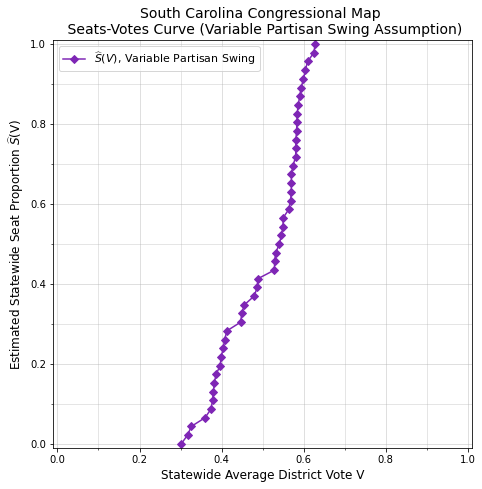

In [158]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

############# ORIGINAL ###############

#plt.figure(figsize=(9,9))
#plt.xlabel("Proportion of Democratic Vote Share")
#plt.ylabel("Proportion of Democratic Seats Won")
#plt.xlim(0,1)
#plt.ylim(0,1)
#plt.plot(MPS_x_vals, MPS_y_vals, 'o-', color='r')
#plt.title('Seats-Votes Curve under Modified Partisan Swing Assumption')
#plt.show()

######################################

fig = plt.figure(figsize=(7.5,7.5))
ax = fig.add_subplot(1,1,1)

major_ticks = np.arange(0, 1.1, .2)
minor_ticks = np.arange(0, 1.1, .1)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.grid(which='minor', alpha=0.4)
ax.grid(which='major', alpha=0.5)

plt.xlabel("Statewide Average District Vote V", fontsize=12)
plt.ylabel("Estimated Statewide Seat Proportion $\widehat{S}$(V)", fontsize=12)
plt.xlim(-.01,1.01)
plt.ylim(-.01,1.01)

plt.plot(MPS_x_vals, MPS_y_vals, 'D-', color='#7e26b5', label='$\widehat{S}(V)$, Variable Partisan Swing')
#plt.title('2018 Pennsylvania Congressional Map \n Seats-Votes Curve (Variable Partisan Swing Assumption)', fontsize=14)
plt.title('South Carolina Congressional Map \n Seats-Votes Curve (Variable Partisan Swing Assumption)', fontsize=14)
plt.grid(True)
plt.legend(fontsize=11)
#plt.savefig('C:/Users/amvag/Dropbox/Masters_Research/Thesis/Vagnozzi_Thesis/PA_2018_SVM.pdf')
plt.show()

# Geometric Bias $B_G$: Variable Partisan Swing

In [159]:
MPS_SVI = []
for point in MPS_SV:
    MPS_SVI.append((1-point[0],1-point[1]))
MPS_SVI = sorted(MPS_SVI)
#print MPS_SVI

In [160]:
MPS_Inv_x_vals = [point[0] for point in MPS_SVI]
MPS_Inv_y_vals = [point[1] for point in MPS_SVI]

#print MPS_Inv_x_vals
#print MPS_Inv_y_vals

In [161]:
# Find intersection points.
int_pts2 = []
for i in range(len(MPS_SV)-1):
    # If we find where two line segments intersect...
    if (MPS_SV[i][0] < MPS_SVI[i][0] and MPS_SV[i+1][0] > MPS_SVI[i+1][0]) or (MPS_SV[i][0] > MPS_SVI[i][0] and MPS_SV[i+1][0] < MPS_SVI[i+1][0]):
        # Find Seats-Votes line segment.
        m1 = (MPS_SV[i+1][1]-MPS_SV[i][1]) / (MPS_SV[i+1][0]-MPS_SV[i][0])
        b1 = MPS_SV[i][1] - m1 * MPS_SV[i][0]
        
        # Find Inverted Seats-Votes line segment.
        m2 = (MPS_SVI[i+1][1]-MPS_SVI[i][1]) / (MPS_SVI[i+1][0]-MPS_SVI[i][0])
        b2 = MPS_SVI[i][1] - m2 * MPS_SVI[i][0]
        
        # Find the intersection point.
        x = (b2-b1)/(m1-m2)
        y = m1 * x + b1
        
        int_pts2.append((x,y))

In [162]:
# Append intersection points to SV and SVI points, then sort.
for pt in int_pts2:
    MPS_SV.append(pt)
    MPS_SVI.append(pt)
MPS_SV = sorted(MPS_SV)
MPS_SVI = sorted(MPS_SVI)

In [163]:
# Create new points for graphing the area between the curves. 
# They include the intersection points, but only for the purpose of being able to use "fill_betweenx".
MPSx = [point[0] for point in MPS_SV]
MPSy = [point[1] for point in MPS_SV]

MPSIx = [point[0] for point in MPS_SVI]
MPSIy = [point[1] for point in MPS_SVI]

# Note that MPSy and MPSIy are basically the same.

In [164]:
############# ORIGINAL ###############

#plt.figure(figsize=(10,10))
#plt.xlim(0,1)
#plt.ylim(0,1)
#plt.plot(MPS_x_vals, MPS_y_vals)
##plt.plot(MPS_x_vals, MPS_y_vals, 'o-')
#plt.plot(MPS_Inv_x_vals, MPS_Inv_y_vals, color="r")
##plt.plot(MPS_Inv_x_vals, MPS_Inv_y_vals, 'o-', color="r")
#plt.title('Modified Partisan Swing Assumption')
#plt.show()

######################################

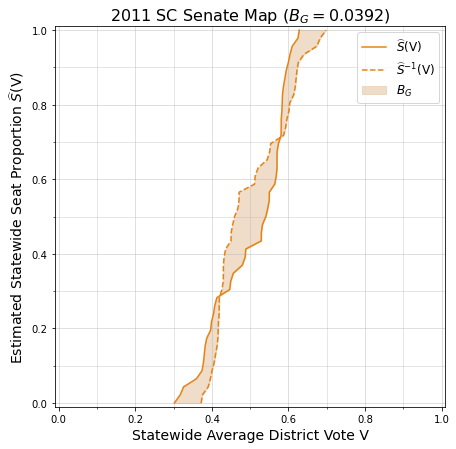

In [165]:
# PLOT THE INVERSE

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)

major_ticks = np.arange(0, 1.1, .2)
minor_ticks = np.arange(0, 1.1, .1)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.grid(which='minor', alpha=0.4)
ax.grid(which='major', alpha=0.5)

plt.xlabel("Statewide Average District Vote V", fontsize=14)
plt.ylabel("Estimated Statewide Seat Proportion $\widehat{S}$(V)", fontsize=14)
plt.xlim(-.01,1.01)
plt.ylim(-.01,1.01)

plt.plot(MPS_x_vals, MPS_y_vals, color='#E68213', label='$\widehat{S}$(V)')
plt.plot(MPS_Inv_x_vals, MPS_Inv_y_vals, color='#E68213', linestyle='--',label='$\widehat{S}^{-1}$(V)')

#plt.fill_betweenx(MPSy,MPSx,MPSIx,color='#A9A9A9',alpha=0.6,label='$B_{G,V}$')
plt.fill_betweenx(MPSy,MPSx,MPSIx,color='#E6C7A5',alpha=0.6,label='$B_{G}$')

#plt.title('2018 Pennsylvania Congressional Map \n Geometric Bias under Variable Partisan Swing', fontsize=14)
plt.title('2011 SC Senate Map ($B_G=0.0392$)', fontsize=16)
plt.grid(True)
plt.legend(fontsize=12)
plt.savefig('C:/Users/Anna Marie Vagnozzi/Dropbox/Masters_Research/Publishing/spp_template/SC2011_Senate.pdf')
#plt.savefig('C:/Users/avagnoz/Dropbox/Masters_Research/2021_Redistricting_Group/partisan_bias_analysis/InputSCCong_Proposed.PNG')
plt.show()

In [166]:
# Calculate total area under the SV and Inverse SV curves.
total_area2 = 0

# 'Integrate' with respect to y
xmax2 = max(MPS_SV[-1][0], MPS_SVI[-1][0])

for i in range(len(MPS_SV)-1):
    # Area under Seats-Votes curve
    b1 = xmax2 - MPS_SV[i][0]
    b2 = xmax2 - MPS_SV[i+1][0]
    h = MPS_SV[i+1][1] - MPS_SV[i][1]
    area1 = 0.5 * (b1 + b2) * h
    
    # Area under Inverted Seats-Votes curve
    ib1 = xmax2 - MPS_SVI[i][0]
    ib2 = xmax2 - MPS_SVI[i+1][0]
    ih = MPS_SVI[i+1][1] - MPS_SVI[i][1]
    area2 = 0.5 * (ib1 + ib2) * ih
    
    total_area2 += abs(area2 - area1)

In [167]:
BG_MPS = total_area2
print("Under the MPS assumption, B_G = " + str(BG_MPS) + " or " + str(round(BG_MPS*100,2)) + "%")

Under the MPS assumption, B_G = 0.039202996835482146 or 3.92%
